In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
market_data_df.shape

(41, 7)

In [5]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                                                                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"]])

In [7]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                                                                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"])

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = market_data_df.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

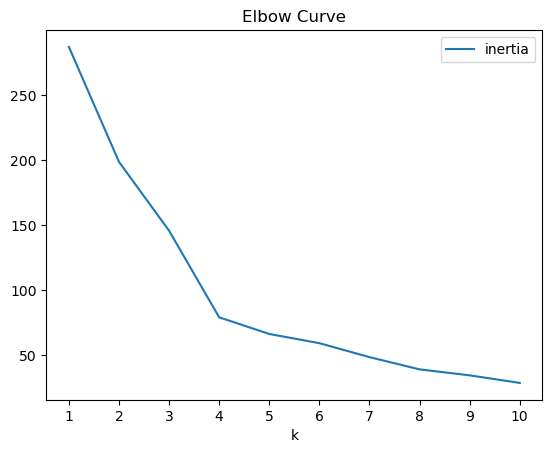

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
After visually inspecting the Elbow Method graph, we determined that the best value for k is 4. This choice is based on identifying the "elbow" point in the plot, where the reduction in inertia (or within-cluster sum of squares) begins to diminish notably. At k = 4, the curve shifts from a steep descent to a more gradual slope, indicating that adding more clusters beyond this point provides minimal additional variance explained relative to the added complexity. Thus, k = 4 offers an optimal balance between clustering accuracy and model simplicity.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=3)

In [11]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)


c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=3)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_predictions = model.predict(df_market_data_scaled)

# View the resulting array of cluster values.
kmeans_predictions

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [15]:
# Create a copy of the DataFrame
market_data_prediction = df_market_data_scaled.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
market_data_prediction['crypto_cluster'] = kmeans_predictions

# Display sample data
market_data_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

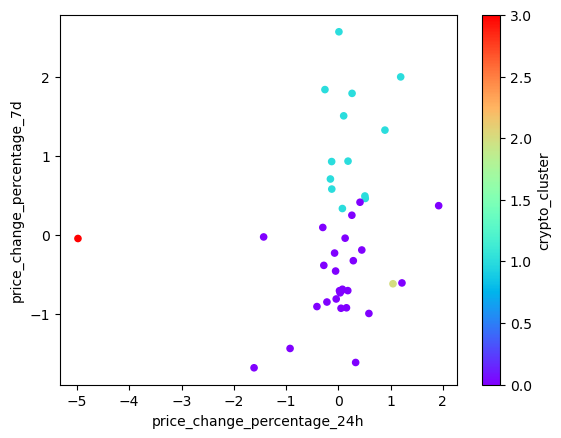

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

market_data_prediction.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [21]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**
The explained variance ratio, `array([0.3719856, 0.34700813, 0.17603793])`, indicates the proportion of the dataset's variance captured by each of the three principal components:

1. **First Principal Component (PC1):** 37.2% of the variance in the data
2. **Second Principal Component (PC2):** 34.7% of the variance
3. **Third Principal Component (PC3):** 17.6% of the variance

### Total Explained Variance
The total explained variance of the three principal components is the sum of the individual explained variances:

\[
0.3719856 + 0.34700813 + 0.17603793 = 0.89503166
\]

Thus, the **total explained variance** is **89.5%**, meaning these three principal components together capture 89.5% of the variability in the original market data. This high value suggests that most of the meaningful variation in the dataset can be represented in these three components, reducing the dimensionality effectively while retaining the essential information.

### Contextual Implications
This high degree of explained variance implies that nearly 90% of the patterns and relationships among coins based on their price percentage changes across various periods can be described using these three principal components. Consequently, further analysis or modeling can focus on these components without losing much information, enabling efficient market trend analysis, correlation study, or clustering based on price behaviors over time. 

### Recommendations
1. **Dimensionality Reduction:** Using these components simplifies the dataset significantly, potentially making downstream tasks like clustering or predictive modeling both faster and more interpretable.
2. **Insights on Market Movement:** Each component could be analyzed to understand which features (price change periods) contribute most to each principal component. This could reveal patterns in market trends, such as sensitivity to short-term versus long-term changes across different coins.


In [26]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data

market_data_pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
df_market_data_scaled_reset = df_market_data_scaled.reset_index()
market_data_pca_df['coin_id'] = df_market_data_scaled_reset['coin_id']

# Set the coinid column as index
market_data_pca_df.set_index('coin_id', inplace=True)

# Display sample data
market_data_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [30]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow

c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


<Axes: title={'center': 'PCA Curve'}, xlabel='k'>

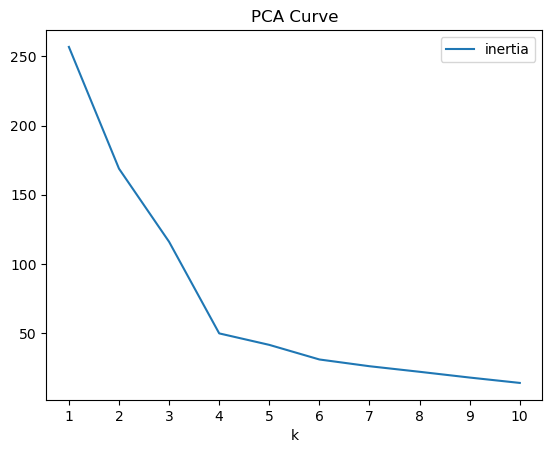

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="PCA Curve", 
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
After visually inspecting the PCA Curve graph, we determined that the best value for k is 4. This choice is based on identifying the "elbow" point in the plot, where the reduction in inertia (or within-cluster sum of squares) begins to diminish notably. At k = 4, the curve shifts from a steep descent to a more gradual slope, indicating that adding more clusters beyond this point provides minimal additional variance explained relative to the added complexity. Thus, k = 4 offers an optimal balance between clustering accuracy and model simplicity.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
To answer the question of whether the best value for \( k \) differs between the PCA-transformed data and the original data, you can respond as follows:

**Answer:**  
No, the best value for \( k \) does not differ between the PCA-transformed data and the original data. Both analyses indicate that \( k = 4 \) is optimal, based on the "elbow" method applied to the inertia curve. This consistency suggests that the principal components retain the primary structure of the data's variance, making \( k = 4 \) an effective choice for clustering in both cases.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [34]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=0)


In [35]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)


c:\Users\adminpl\.conda\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [36]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [42]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_df_copy = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_df_copy['crypto_cluster'] = k_4

# Display sample data
market_data_pca_df_copy.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [64]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

market_data_pca_df_copy.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap = 'winter'
)

:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [69]:
# Use the columns from the original scaled DataFrame as the index.

pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_data_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
To determine which features have the strongest influence on each principal component, we’ll analyze both the positive and negative loadings of each feature for **PCA1**, **PCA2**, and **PCA3**. These loadings reflect the contribution of each feature to a component’s direction and strength. High positive or negative values indicate a strong influence, whether pushing the component higher or pulling it lower.

### Analysis by Component

1. **PCA1 (Dominant Features in Long-Term Price Changes):**
   - **Strongest Positive Influences:**
     - `price_change_percentage_200d` with a loading of **0.594**
     - `price_change_percentage_1y` with a loading of **0.568**
   - **Strongest Negative Influence:**
     - `price_change_percentage_24h` with a loading of **-0.417**

   **What does it mean?:**  
   PCA1 is primarily influenced by long-term price changes, as shown by the strong positive loadings from `price_change_percentage_200d` and `price_change_percentage_1y`. This suggests that PCA1 captures trends that differentiate assets based on their long-term growth or depreciation. The negative influence from `price_change_percentage_24h` indicates that short-term volatility (daily fluctuations) moves in an opposite direction to these long-term trends within this component.

2. **PCA2 (Dominant Features in Mid-Term Price Changes):**
   - **Strongest Positive Influences:**
     - `price_change_percentage_30d` with a loading of **0.562**
     - `price_change_percentage_14d` with a loading of **0.540**
     - `price_change_percentage_60d` with a loading of **0.434**
   - **Strongest Negative Influence:**
     - `price_change_percentage_1y` with a loading of **-0.151**

   **What does it mean?:**  
   PCA2 captures mid-term price changes. The highest positive loadings are from `price_change_percentage_30d`, `price_change_percentage_14d`, and `price_change_percentage_60d`, indicating that PCA2 differentiates assets based on their monthly to bi-monthly performance. The slight negative loading from `price_change_percentage_1y` implies a weak inverse relationship between recent mid-term performance and longer-term annual trends.

3. **PCA3 (Dominant Features in Short-Term Weekly Price Changes):**
   - **Strongest Positive Influence:**
     - `price_change_percentage_7d` with a loading of **0.788**
   - **Strongest Negative Influences:**
     - `price_change_percentage_60d` with a loading of **-0.361**
     - `price_change_percentage_30d` with a loading of **-0.182**

   **What does it mean?:**  
   PCA3 is predominantly influenced by short-term weekly changes, with `price_change_percentage_7d` showing the strongest positive loading across all components. This indicates that PCA3 captures volatility or trends within a one-week period. The negative influences from `price_change_percentage_60d` and `price_change_percentage_30d` suggest that assets with high short-term weekly price changes may exhibit contrasting trends in their bi-monthly or monthly performance.

### Summary
Each principal component reveals patterns in different timeframes:
- **PCA1** is driven by long-term price trends.
- **PCA2** reflects mid-term (monthly to bi-monthly) trends.
- **PCA3** captures short-term (weekly) price fluctuations.

These insights can be instrumental in clustering assets based on their temporal performance characteristics, helping distinguish between assets with long-term stability versus those with short-term volatility. This understanding can inform strategic portfolio allocations, targeting assets that align with specific investment time horizons.